<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
# Time series seasonal - exercises

--- 

In [5]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The following dataset contains seasonally non-adjusted quarterly data on income and consumption in the UK.

In [7]:
df = pd.read_csv('datasets/IncomeUK.csv')

In [8]:
df.head()

,income,consumption
0,9014,8016
1,9659,8798
2,9848,9184
3,10316,9755
4,10254,9113


### 0. The values represent quarterly data from 01/01/1971 to 30/06/1985.

Create the corresponding datetime index.

In [13]:
df['date']=pd.date_range('01/01/1971','30/06/1985',freq='Q')
df.set_index('date',drop=True,inplace=True)
df.head()

,income,consumption
date,,
1971-03-31,9014,8016
1971-06-30,9659,8798
1971-09-30,9848,9184
1971-12-31,10316,9755
1972-03-31,10254,9113


### 1. Plot the time series for consumption.

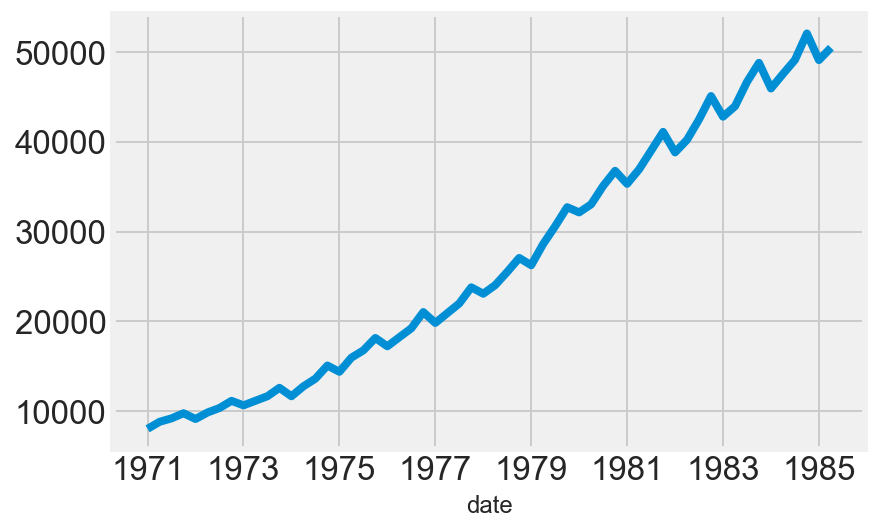

In [14]:
df.consumption.plot()

### 2. Which order of differencing would you recommend?

In [29]:
from statsmodels.tsa.stattools import adfuller
adfuller(df.diff().diff().dropna().consumption)
# second order differencing seems to be good here

(-5.135772085940965,
 1.1873742734290505e-05,
 6,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 676.6448750691636)

### 3. Look at the autocorrelations and partial autocorrelations of consumption and its differences. Describe.

In [33]:
#it seems that we have good correlation between shifts.
from statsmodels.tsa.stattools import pacf,acf
acf(df.consumption,nlags=5)[1:],pacf(df.consumption,nlags=5)[1:]

(array([0.95230627, 0.9088966 , 0.85945789, 0.81698708, 0.76570074]),
 array([ 0.9690134 ,  0.03884775, -0.13226755,  0.0726143 , -0.17324868]))

### 4. Decompose into seasonal and non-seasonal parts.

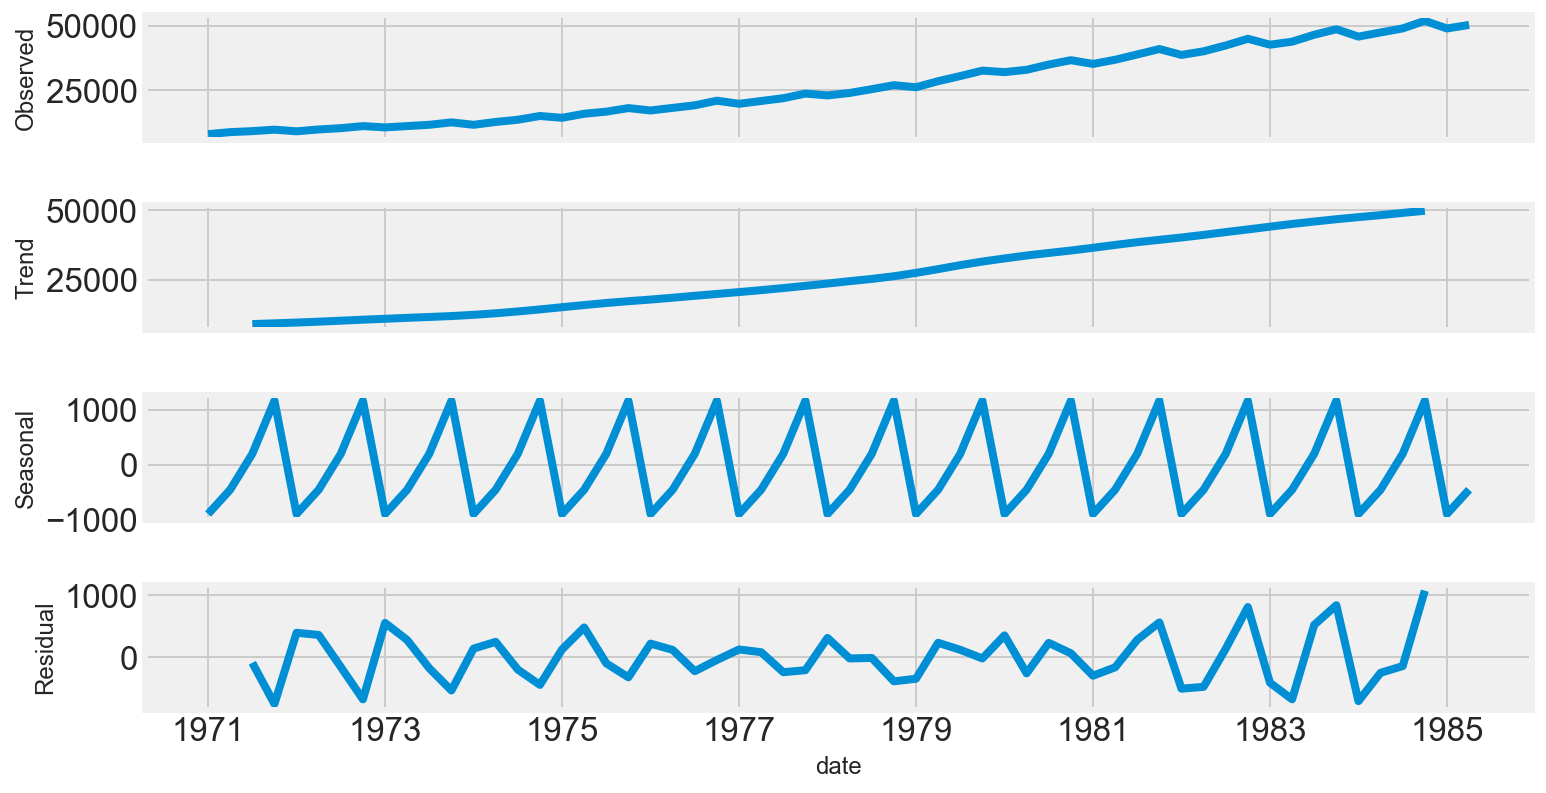

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
#plt.figure(figsize=(6,6))
seasonal_decompose(df.consumption).plot().set_size_inches(12,6)


### 5. Perform a Dickey-Fuller test for stationarity on consumption and its differences.

### 6. Do you get better results in the Dickey-Fuller test if you take into account seasonality effects?

### 7. Irrespective of your previous answers, fit a SARIMA model to consumption. Which parameters did you choose for the non-seasonal and seasonal components?

### 8. Describe your diagnostic plots of the residuals. Check for residual autocorrelations.

### 9. Obtain fitted values with one-step ahead forecasts, in-sample forecasts and out-of sample forecasts. Compare the forecasts of different models.